# Análisis de los 25 retailers más grandes de Estados Unidos

In [2]:
# Importar librerías aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importar datos aquí
df = pd.read_csv('./data/largest_us_retailers.csv')
df.head()

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores


¿cuál empresa vendió más?

a) Escribe tu código dentro de celdas de código
Ejecuta el código que necesites para llegar al resultado que necesitas.

In [4]:
df_sorted = df.sort_values('Sales', ascending=0)
df_sorted


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


b) Comparte insights con visualizaciones
Con ayuda de Matplotlib o Seaborn crea las gráficas que necesites para dar a conocer tu resultado e incluso enriquecerlo.

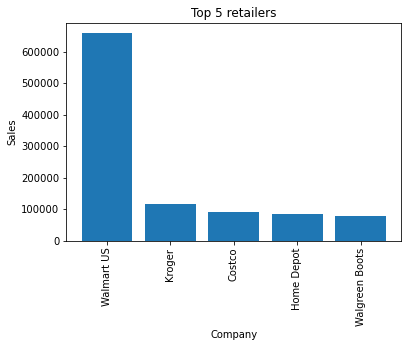

In [5]:
x = df_sorted['Company'][0:5]  # Aplicamos slicing como en una lista de Python.
y = df_sorted['Sales'][0:5]

plt.bar(x, y)
plt.title('Top 5 retailers')
plt.xlabel('Company')
plt.ylabel('Sales')
# Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.xticks(rotation='vertical')
plt.show()


c) Conclusiones
Debajo de tus resultados escribe conclusiones de lo que necesites resaltar de acuerdo a lo que observes. Utiliza esa intuición de los datos y dominio del negocio. Hazlo en una celda de texto en tu notebook.

Aspectos a evaluar:

- Responder la mayor cantidad de preguntas.
- Valor y veracidad de la información encontrada con las preguntas.
- Valor y veracidad de la información que entregues con los resultados de tus propias preguntas.
- Storytelling: visualizaciones fáciles de entender que muestren información valiosa, claridad y valor de tus conclusiones para cada hallazgo.

## Exploracion de datos

In [13]:
df.shape

(25, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


<AxesSubplot:xlabel='Sales', ylabel='Count'>

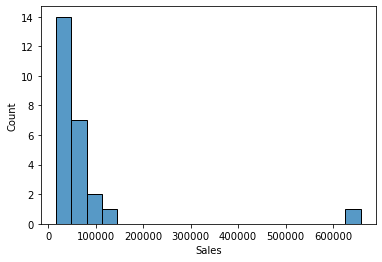

In [32]:
sns.histplot(
    data=df['Sales'],
)


<AxesSubplot:xlabel='Sales', ylabel='Company'>

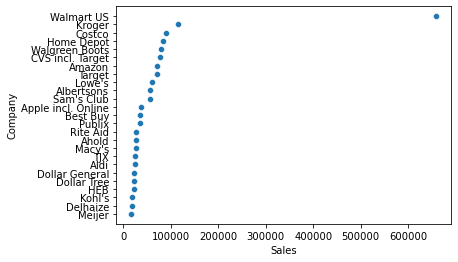

In [8]:
sns.scatterplot(
  data=df,
  x='Sales',
  y='Company',
)

podemos observar que Wallmart es un Outlier estadistico ya que su valor es cientos de veces superior a los demás.

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

#### Comportamiento de todo el set de datos

In [51]:
# Medidas de tendencia central en todo el dataframe
df.describe()


,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.000000,23.000000,23.000000,23.000000
mean,71063.080000,3466.565217,36.870966,0.040230
std,125405.727644,4038.708714,40.625277,0.068552
min,16592.000000,231.000000,1.563919,-0.059515
25%,24402.000000,1029.000000,11.263462,-0.001860
50%,34980.000000,1828.000000,25.997733,0.019520
75%,71687.000000,4242.000000,41.358955,0.078934
max,658119.000000,14250.000000,187.795620,0.255662


Text(0.5, 1.0, 'Histograma de todas las ventas')

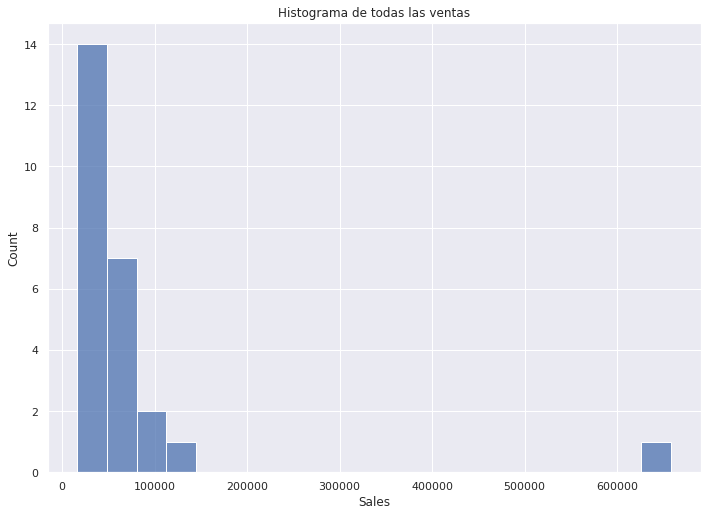

In [59]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.histplot(x=df['Sales'])
chart.set_title('Histograma de todas las ventas')



<AxesSubplot:xlabel='Sales', ylabel='Company'>

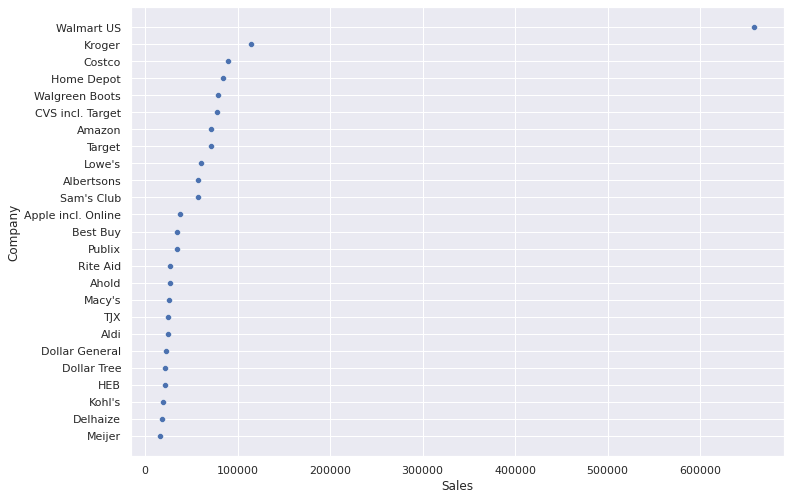

In [55]:
# Podemos ver cuales es la distribucion de datos por compañia
sns.scatterplot(
    data=df,
    x='Sales',
    y='Company',
)


En los scatter plots podemos ver la diferencia tan grande que existe entre los valores y Wallmart US la cual es una compañia que es Outlier ya que su valor es cientos de veces superior a los demás.

Text(0.5, 1.0, 'Diagrama de Caja todas las ventas')

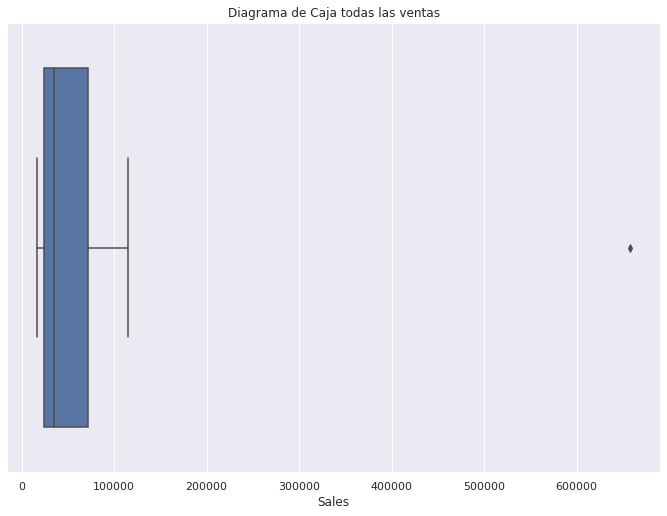

In [58]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.boxplot(x=df['Sales'])
chart.set_title('Diagrama de Caja todas las ventas')



Con el digrama de caja podemos ver como el valor de 658119 en ventas de Wallmart US es un Outlier estadistico, y ademas es **el unico Outlier de todo el dataset.**

#### Comportamiento del set de datos sin Wallmart US

In [53]:
# Walmart US esta en la posicion 0
# df[1:]
# Filtro para mayor seguridad en caso de cambios al dataset
df_without_top = df.drop(df[df['Company'] == 'Walmart US'].index)
df_without_top.head()


,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores


In [54]:
df_without_top.describe()


,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.000000,22.000000,22.000000,22.000000
mean,46602.416667,3416.227273,35.562840,0.041475
std,28317.981841,4126.358592,41.082510,0.069899
min,16592.000000,231.000000,1.563919,-0.059515
25%,23860.000000,959.000000,10.537195,-0.002790
50%,34694.000000,1800.000000,25.341845,0.026687
75%,71327.750000,3640.750000,38.598240,0.079281
max,115037.000000,14250.000000,187.795620,0.255662


<AxesSubplot:xlabel='Sales', ylabel='Company'>

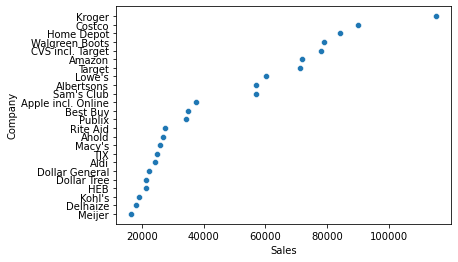

In [35]:
sns.scatterplot(
    data=df_without_top,
    x='Sales',
    y='Company',
)


Text(0.5, 1.0, 'Histograma de la mayoria las ventas')

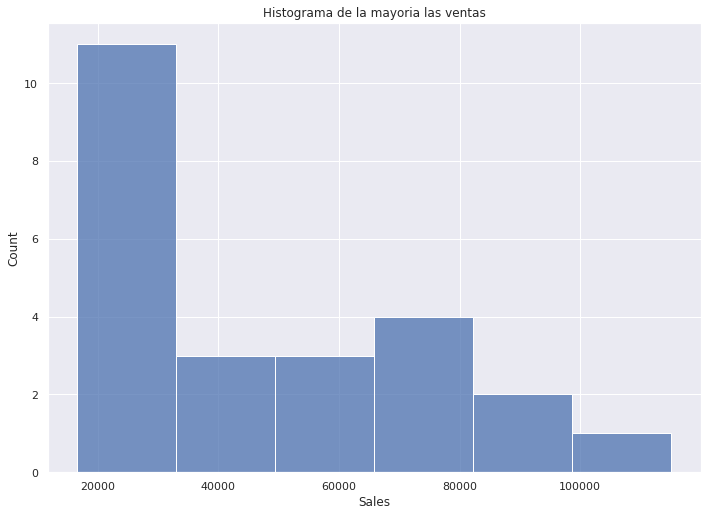

In [57]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.histplot(x=df_without_top['Sales'])
chart.set_title('Histograma de la mayoria las ventas')

Text(0.5, 1.0, 'Diagrama de Caja la moyoria de las ventas')

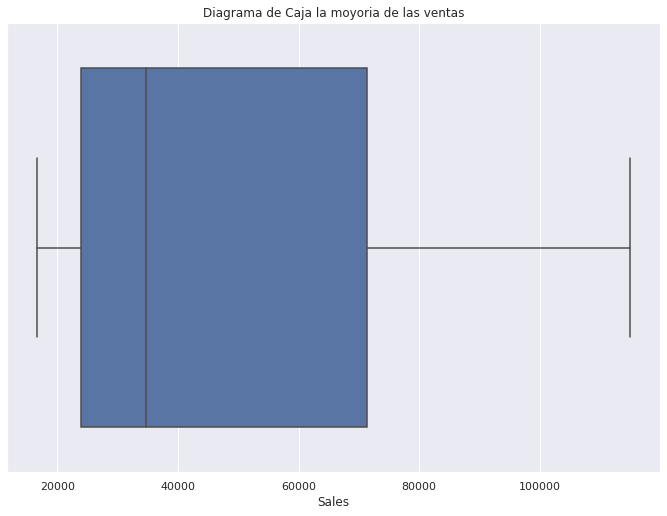

In [56]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
chart = sns.boxplot(x=df_without_top['Sales'])
chart.set_title('Diagrama de Caja la moyoria de las ventas')


Podemos ver que el promedio de las ventas considerando Wallmart US es de $71063.08 mientras que el promedio de las ventas sin considerar Wallmart US es de $46602.41, dandonos cuenta que Wallmart tiene un valor tan elevado que eleva el promedio $20000 más de considerar solamente la mayoria de las compañias

#### Conclusiones

El promedio de ventas sin contar la compañia dominante es de $46602.41


### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

### 5. ¿Cuál es el rango que existe entre las ventas?

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

## III. Tus propias preguntas

### 10. Pregunta

### 11. Pregunta

### 12. Pregunta

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edc68bfa-8df4-47a4-8622-860ebb931fe9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>